# This Exploration Notebook evaluates the udacity dataset.

In [1]:
%matplotlib inline
import matplotlib

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import cv2
import glob

import logging as log
import sys
log.basicConfig(stream=sys.stderr, level=log.DEBUG)
import pickle

from search_classify import *
from heatmap import *
from lesson_functions import *

C:\Tools\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
images = glob.glob("video2images/all/*.png")
log.info("Number of images: " + str(len(images)))

INFO:root:Number of images: 64


1.0 0.0


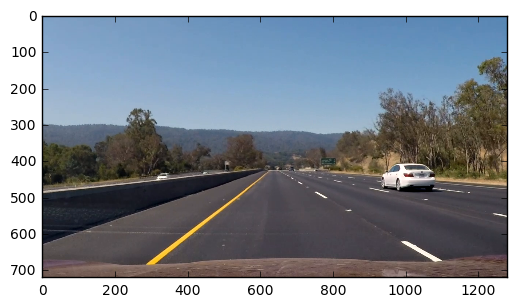

In [3]:
image = mpimg.imread(images[20])
plt.imshow(image)
print(np.max(image), np.min(image))

In [6]:
feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

[ 0.60642749  0.41992307  0.59369254 ...,  0.31183922  0.54503363
  0.47369328]
(3072,)


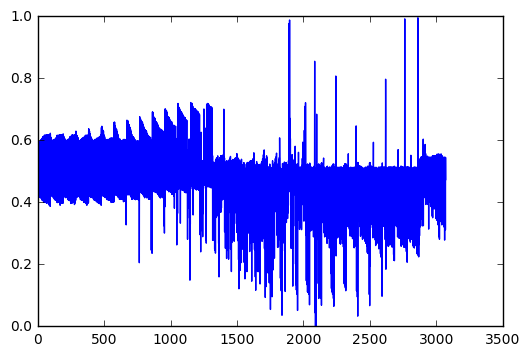

In [7]:
spatial_features = bin_spatial(feature_image, size=spatial_size)

print(spatial_features)
print(spatial_features.shape)

plt.plot(spatial_features)

[  1887   2828   8404  26118  16857  16310  19711  36811  88653 103518
  81096  49935  36166  23248  13499  13818  42551  53895  65450  63045
  50298  47805  44598   6604   1057   2072    748    494    490    549
    678   2407      0      0      0      0      0      0      0      0
      0      0      0      0  71704 218144  84052  92857 343693 100811
   6347   1371   2298    315      8      0      0      0      0      0
      0      0      0      0      0      0      0     29    178    752
    673    582    531    411    487    577   6318  19967  95105 153583
 251416  71003 135868 184120      0      0      0      0      0      0
      0      0      0      0      0      0]
(96,)


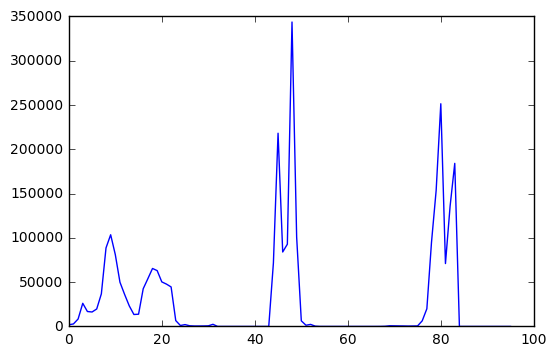

In [8]:
hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=(0, 1))

print(hist_features)
print(hist_features.shape)

plt.plot(hist_features)

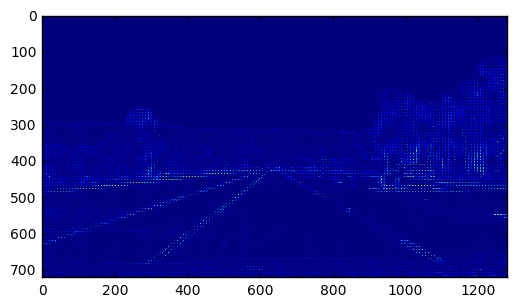

In [13]:
features, hog_image = get_hog_features(feature_image[:,:,0],
                                orient, 
                                pix_per_cell,
                                cell_per_block,
                                vis=True,
                                feature_vec=True)

plt.imshow(hog_image)